# Network Notes

In [70]:
network_model = "tale-prog-large3"
iter1 = 40
iter2 = 540

network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30
'''
network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110
'''
network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340

'''
network_model = "tale-prog-stateful8l"
iter1 = 190
iter2 = 460

network_model = "tale-prog-sf8k7"
iter1 = 5
iter2 = 5
'''

from subprocess import check_output, call

import os
os.chdir("/home/ec2-user/store/c2gen/notebooks")


cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])
cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
res = check_output(["tail", "-n 12", "/home/ec2-user/store/c2gen/out/"+network_model+"/log"])
res = str(res).replace('\\n', "\n")
print(res)
try:
  res = check_output(["tail", '-n 1', "/home/ec2-user/store/c2gen/nohup/"+network_model+".out"])
  res = str(res).replace('\\n', "\n")
  res = str(res).replace('\\r', "\n")
  Res = str(res).replace('\\x08', "")
  res = res.split("\n")[-1]
  print(res)

except:
  print("-") 

b'Training Iteration 343 
Training Iteration 344 
Training Iteration 345 
Generating samples 
saving generated sample output to:  out/tale-prog-quick2/out-c2cb-345 
generating sample data of length:  400 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  400 
Training Iteration 346 
Training Iteration 347 
Training Iteration 348 
Interrupt signal caught. Closing gracefully. 
'
-


In [71]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [72]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
40 units
tanh activation
0.1 dropout

lstm_2 : LSTM
trainable?  False
40 units
tanh activation
0.1 dropout

lstm_3 : LSTM
trainable?  False
40 units
tanh activation
0.1 dropout

dense_1 : Dense
trainable?  True
16 units
relu activation
 dropout

dropout_1 : Dropout
trainable?  True
 units
 activation
 dropout



Early Iterations
===

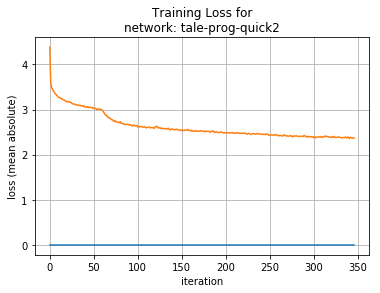

In [73]:
nd.plot_training_loss(network_model)

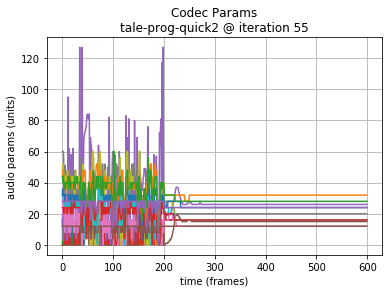

In [74]:
nd.plot_codec_params(network_model,iter1)

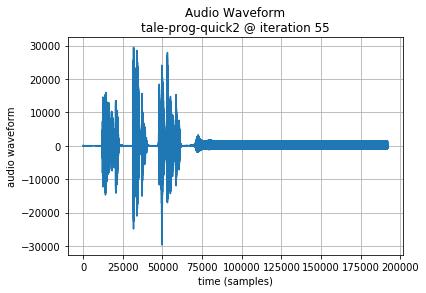

In [75]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [76]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

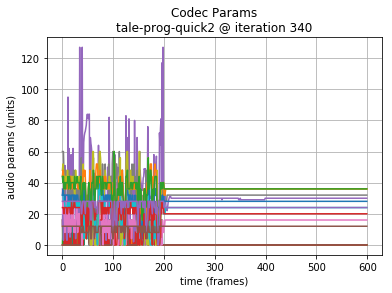

In [77]:
nd.plot_codec_params(network_model,iter2)

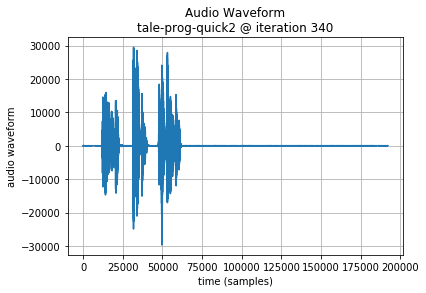

In [78]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [79]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))